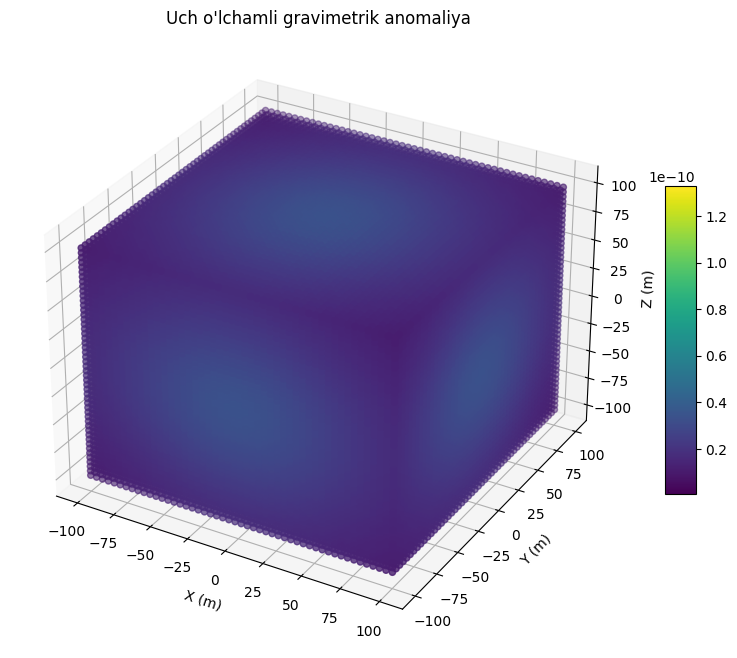

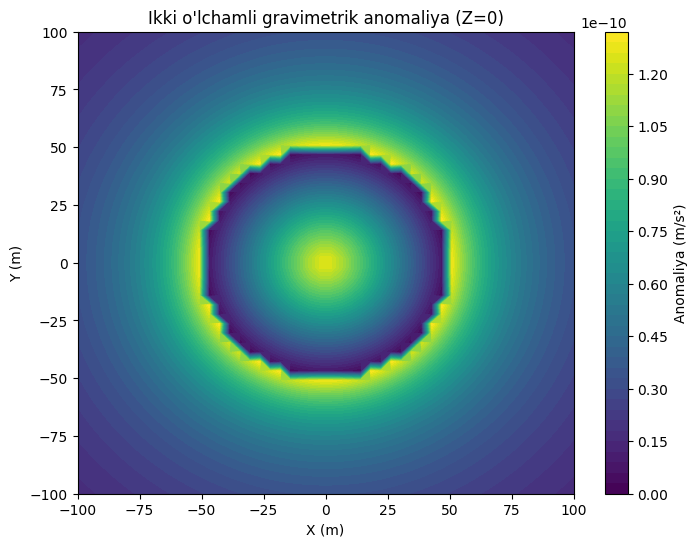

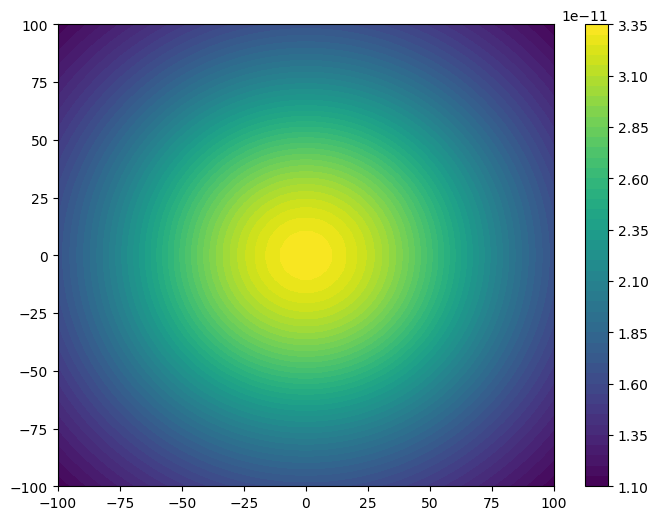

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gravitatsion doimiylik
G = 6.674 * 10**-11  # N·m²/kg²

# Parametrlarni aniqlash
mass = 5000  # Massa (kg)
radius = 50  # Sfera radiusi (m)
x_range = np.linspace(-100, 100, 50)
y_range = np.linspace(-100, 100, 50)
z_range = np.linspace(-100, 100, 50)

# 3D sfera ichidagi gravimetrik anomaliyani hisoblash funksiyasi
def gravity_anomaly(x, y, z, mass, radius):
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.where(r <= radius, G * mass / radius**3 * (radius - r), G * mass / r**2)

# 3D fazoda anomaliya yaratish
X, Y, Z = np.meshgrid(x_range, y_range, z_range)
anomaly_3d = gravity_anomaly(X, Y, Z, mass, radius)

# 2D kesim olish (Z=0 tekisligi)
anomaly_2d = anomaly_3d[:, :, len(z_range) // 2]

# 3D grafik: Uch o'lchamli anomaliya
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=anomaly_3d.flatten(), cmap="viridis", marker='o')
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
plt.title("Uch o'lchamli gravimetrik anomaliya")
plt.colorbar(scat, ax=ax, shrink=0.5, aspect=10)
plt.show()

# 2D grafik: Ikki o'lchamli anomaliya
plt.figure(figsize=(8, 6))
plt.contourf(x_range, y_range, anomaly_2d, levels=50, cmap="viridis")
plt.colorbar(label="Anomaliya (m/s²)")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Ikki o'lchamli gravimetrik anomaliya (Z=0)")
plt.show()

# Animatsiya: Kesim bo'ylab anomaliya o'zgarishi
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(x_range, y_range, anomaly_3d[:, :, 0], levels=50, cmap="viridis")
plt.colorbar(contour, ax=ax)

def update(frame):
    ax.clear()
    data = anomaly_3d[:, :, frame]
    contour = ax.contourf(x_range, y_range, data, levels=50, cmap="viridis")
    ax.set_title(f"Kesim bo'ylab anomaliya (Z-index={frame})")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    return contour

ani = FuncAnimation(fig, update, frames=len(z_range), repeat=False)
plt.show()
